<a href="https://colab.research.google.com/github/iamabhaydawar/learn_mL/blob/main/tensorflow_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation and Processing

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

Example Data:
An experimental drug was tested on individuals from ages 13 to 100 in a clinical trail
The trail had 2100 participants. Half were under 65 years old,half were 65 years or older.
Around 95% of patients 65 or older experienced side effects
Around 95% of patients under 65 experienced no side effects




In [ ]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
for i in range(1000):
    #The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    #The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
for i in train_samples:
    print(i)

In [ ]:
for i in train_labels:
    print(i)

In [ ]:
train_labels= np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
for i in scaled_train_samples:
    print(i)

Simple tf.keras Sequential **Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num Gpu's Available:",len(physical_devices))
if len(physical_devices) > 0:
    config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num Gpu's Available: 0


In [ ]:
model=Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels,validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=0)

In [ ]:
test_labels = []
test_samples = []
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    #The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    #The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    #The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [ ]:
test_labels= np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, train_samples = shuffle(test_labels, test_samples)

In [ ]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

Pridicting

In [ ]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [ ]:
for i in predictions:
    print(i)

In [ ]:
rounder_predictions=np.argmax(predictions, axis=-1)

In [ ]:
for i in rounder_predictions:
    print(i)

Confusion Matrix

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounder_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

    Parameters:
    -----------
    cm : array-like of shape (n_classes, n_classes)
        Confusion matrix to be plotted
    classes : list of str
        List of class names to display on axes
    normalize : bool, optional (default=False)
        Whether to normalize the confusion matrix
    title : str, optional
        Title for the plot
    cmap : matplotlib colormap, optional
        Colormap for the plot
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[492 558]
 [524 526]]


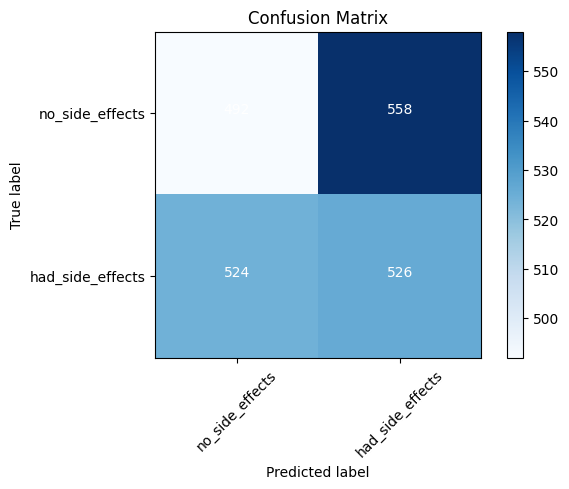

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')